In [97]:
import pandas as pd
import numpy as np
import scipy as sc
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

# Zadanie 1 (4 pkt.)

Przeprowadź test T studenta na danych w pliku wyniki.csv

Hipoteza zerowa brzmi: nie ma istotnej różnicy w Ocenie końcowej pomiędzy uczniami i uczennicami.

Hipoteza alternatywna brzmi: istnieje istotna różnica (bez wskazania kierunku) w Ocenie końcowej pomiędzy uczniami i uczennicami.

Przyjmij significance level (alpha) na poziomie 0.05. Czy uda się odrzucić hipotezę zerową?


In [6]:
df = pd.read_csv("wyniki.csv")

In [13]:
kobiety = df.query("plec == 'F'")
mezczyzni = df.query("plec == 'M'")

In [15]:
# Sprawdzenie czy wariancja w grupach jest podobona
print(np.var(mezczyzni.ocena_koncowa), np.var(kobiety.ocena_koncowa))

10.557700108166575 10.022673484295106


In [18]:
sc.stats.ttest_ind(kobiety.ocena_koncowa, mezczyzni.ocena_koncowa,equal_var=True)

Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.0531131748457915)

In [19]:
# Jest minimalna róznica, nie odrzucamy H0 - przyjmujemy ją jako prawdziwą jako pval > 0.05.

# Zadanie 2 (2 pkt)

Korzystając z danych w pliku ZyskiFirmyX.csv stwórz model regresji liniowej i biblioteki statmodels:

•	Wyświetl wykres pokazujący zyski w czasie. 

•	Czy da się zaobserwować trend? Jaki?

•	Wyświetl podsumowanie modelu.


In [21]:
df2 = pd.read_csv("ZyskiFirmyX.csv")
df2.columns

Index(['Rok', 'Zysk'], dtype='object')

In [31]:
px.scatter(df2, y="Zysk", x="Rok",trendline="ols")

#Nie wygląda na to, zeby był jakiś trend

In [42]:
reg_lin = sm.OLS(endog=df2.Zysk, exog=df2.Rok)
res = reg_lin.fit()

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Zysk   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              870.1
Date:                Tue, 17 Jan 2023   Prob (F-statistic):                    1.39e-74
Time:                        18:58:32   Log-Likelihood:                         -1522.0
No. Observations:                 200   AIC:                                      3046.
Df Residuals:                     199   BIC:                                      3049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rok            0.5315      0.018     29.498      0.000       0.496       0.567
==============================================================================
Omnibus:                        0.622   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.542
Skew:                          -0.127   Prob(JB):                        0.762
Kurtosis:                       2.991   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Zadanie 3 (6 pkt.)
Korzystając z danych w pliku spendingscores.csv i biblioteki statmodels:
1.	stwórz model regresji liniowej, gdzie zmienną zależną jest Spending score, a zmiennymi niezależnymi pozostałe zmienne.
2.	Z modelu wyświetl:
a.	p values
b.	standard dev
c.	coefficients
3.	Sprawdź czy istnieje korelacja pomiędzy zmiennymi. Pokaż to na wykresie, np. z biblioteki plotly express.
4.	Korzystając z eliminacji wstecznej usuń najmniej istotną zmienną i jeszcze raz wyświetl model.

UWAGA: zwróć uwagę na zmienne będące kategoriami!


In [91]:
df3 = pd.read_csv("spendingscores.csv")
df3[['Female', 'Male']] = pd.get_dummies(df3.Gender)
df3 = df3.drop('Gender', axis=1)
df3.columns

Index(['Age', 'AnnualIncome', 'SpendingScore', 'Female', 'Male'], dtype='object')

In [98]:
train, test = train_test_split(df3, test_size=0.2)

In [109]:
reg_lin = sm.OLS(endog=train.SpendingScore, exog=train[["Age", "AnnualIncome", "Female", "Male"]])
res = reg_lin.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SpendingScore   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     7.092
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           0.000169
Time:                        19:25:45   Log-Likelihood:                -733.36
No. Observations:                 160   AIC:                             1475.
Df Residuals:                     156   BIC:                             1487.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.6120      0.136     -4.493      0.000      -0.881      -0.343
AnnualIncome     0.0090      0.074      0.121      0.904      -0.137       0.155
Female          74.2084      7.250     10.236      0.000      59.888      88.529
Male            71.3674      7.773      9.182      0.000      56.014      86.721
==============================================================================
Omnibus:                        4.772   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.587
Skew:                          -0.238   Prob(JB):                        0.166
Kurtosis:                       2.442   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
res.pvalues

Age             1.361096e-05
AnnualIncome    9.035542e-01
Female          3.925011e-19
Male            2.462075e-16
dtype: float64

In [101]:
res.bse

Age             0.136219
AnnualIncome    0.074092
Female          7.249818
Male            7.772686
dtype: float64

In [103]:
res.params

Age             -0.612019
AnnualIncome     0.008992
Female          74.208400
Male            71.367381
dtype: float64

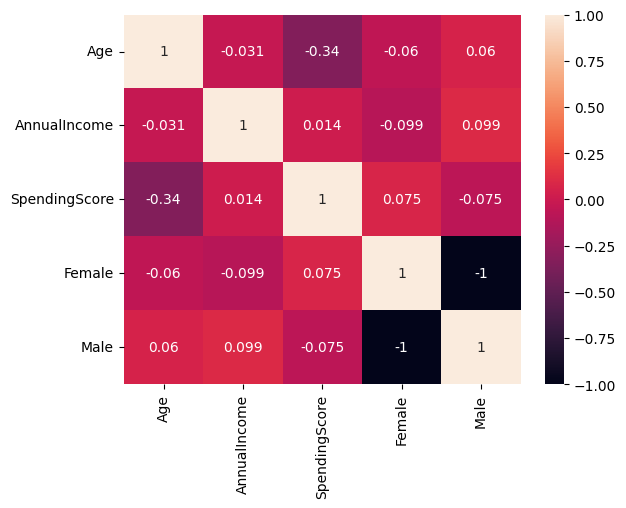

In [104]:
corel =   train.corr()
fig = sns.heatmap(corel,annot=True)

In [107]:
reg_lin2 = sm.OLS(endog=train.SpendingScore, exog=train[["Age", "Female", "Male"]])
res2 = reg_lin.fit()

In [108]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SpendingScore   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     10.70
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.41e-05
Time:                        19:25:30   Log-Likelihood:                -733.37
No. Observations:                 160   AIC:                             1473.
Df Residuals:                     157   BIC:                             1482.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.6126      0.136     -4.515      0.000      -0.881      -0.345
Female        74.7453      5.726     13.054      0.000      63.436      86.055
Male          71.9515      6.084     11.826      0.000      59.934      83.969
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.488
Skew:                          -0.231   Prob(JB):                        0.175
Kurtosis:                       2.443   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Oszacowanie Adjusted R squared wzrosło, kryteria informacyjne zmalały - drugi model bez zmiennej income jest lepszy